In [1]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from astropy.wcs import WCS
import os
import scipy.stats as stats
import json
import pandas as pd
from fitsutil import *
from bc_imaging_analysis import imaging_analysis
from xraysky.scripts import events_imaging
from bcpsf import *
from numba import jit
import pickle



/storage/home/ajo5182/.conda/envs/xhcd/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This one is for windows

In [ ]:
eventPath = Path(
    r"Z:/Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233_HORI_0_0\Analysis\imaging_analysis_20241213\combined_events_th1_200.fits.gz"
)
d = fits.open(eventPath)

In [ ]:
eventPath = Path(
    r"/mnt/z/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/y2024-12-12/BC057_Ti_FF_233_HORI_0_0/Analysis/imaging_analysis_20241213/combined_events_th1_200.fits.gz"
)
d = fits.open(eventPath)
cols = d[1].columns
(d[1].header)

In [ ]:
print(type(d))
evntlist_in_browser(eventPath)

In [ ]:
#signal, trash = splitEventList(d,3020,"sum")
signal, noiseShelf = splitEventList(d,550,"sum")
noiseShelf.columns = cols
noiseShelf.header = d[1].header
noiseShelf.writeto("/home/laurel/astro/testing/noiseshelf.fits.gz",overwrite=True)
signal.columns = cols
signal.header = d[1].header
signal.writeto("/home/laurel/astro/testing/signal.fits.gz",overwrite=True)

In [ ]:
noise = Spectrum("/home/laurel/astro/testing/noiseshelf.fits.gz",th1 = 200, th2=60)
noise.plotSpectrum(binsize=10)
sig = Spectrum("/home/laurel/astro/testing/signal.fits.gz",th1 = 200, th2=60)
sig.plotSpectrum(binsize=10)

In [ ]:
a,b = halfEventList(signal)

In [ ]:
random_a = random_sample_events_list(a,1500)
random_b = random_sample_events_list(b,1000)

In [ ]:
noise = np.array(noiseShelf.data)


In [ ]:
random_a.data = np.append(random_a.data,noiseShelf.data)
print(len(random_a.data))

In [ ]:
SampleHDU = fits.BinTableHDU.from_columns(cols)
random_a.columns = cols
random_a.header = d[1].header
random_a.writeto("/home/laurel/astro/testing/test.fits.gz",overwrite=True)


In [ ]:
test = fits.open("/home/laurel/astro/testing/test.fits.gz")
test[1].header

In [ ]:
test = Spectrum("/home/laurel/astro/testing/test.fits.gz",th1 = 200, th2=60)
test.plotSpectrum(binsize=10)
#out = test.filterEvents(sumrange=[0,550])
#out.plotSpectrum(binsize=10)


In [ ]:
imager= events_imaging.BC_Imaging()
imageOut = imager.evtlist2image(
    "/home/laurel/astro/testing/test.fits.gz","/home/laurel/astro/testing/test_reconstruct.fits.gz"
)
imager.plotSource(imageOut)
peaks = imager.imager.findpeaks(imageOut.data.T) # Index 5 has the significance

In [3]:
d1 = fits.open("/scratch/ajo5182/psfSamples/image_reconstruction/BC057_Ti_FF_233_HORI_15_0_samp1.fits.gz")
d2 = fits.open("/scratch/ajo5182/psfSamples/image_reconstruction/BC057_Ti_FF_233_HORI_15_0_samp2.fits.gz")


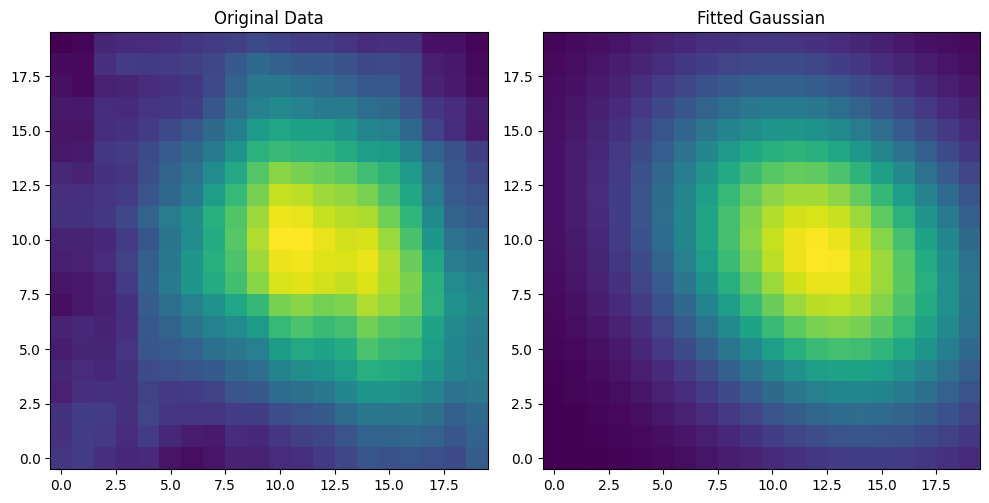

In [16]:
test,cov1 = analyze_localization(d1,plot=True)

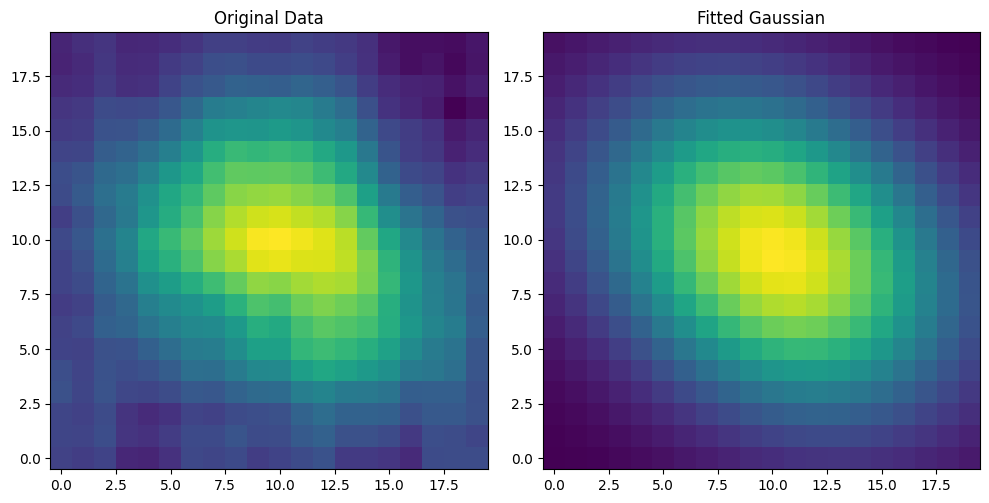

In [15]:
test2,cov2 = analyze_localization(d2,plot=True)

In [6]:
test2 = analyze_localization_directory("/home/laurel/astro/testing/test_reconstruct.fits.gz")

FileNotFoundError: [Errno 2] No such file or directory: '/home/laurel/astro/testing/test_reconstruct.fits.gz'

In [9]:
#test = pd.DataFrame.from_dict(test,orient= 'index')
test2 = pd.DataFrame.from_dict(test2,orient= 'index')

In [26]:
a = [None]*2
a[0] =test
a[1] = test2

In [ ]:
log = np.empty([len(folder_list),2]) # create empty array to hold a log of stuff


for windows

In [ ]:
# for windows
fileDirectory = r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12"

for running on WSL


In [ ]:
fileDirectory = r"/mnt/z/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/y2024-12-12"
outDirectory = r"/mnt/z/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/psfSamples"
splitThreshold = 550
numberOfRandomSamples = 1500
folder_list = [folder for folder in os.listdir(fileDirectory) if os.path.isdir(os.path.join(fileDirectory, folder))]


For Roar

In [ ]:
fileDirectory = r"/storage/group/adf15/default/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/y2024-12-12"
outDirectory = r"/scratch/ajo5182/psfSamples" 
splitThreshold = 550
numberOfRandomSamples = 1500
folder_list = [folder for folder in os.listdir(fileDirectory) if os.path.isdir(os.path.join(fileDirectory, folder))]

In [ ]:
#folder_list = [folder for folder in os.listdir(fileDirectory) if os.path.isdir(os.path.join(fileDirectory, folder))]

log = [[None for _ in range(2)] for _ in range(len(folder_list))] #np.empty([len(folder_list),2],str) # empty array to log errors and wahtnot

for a in range(len(folder_list)):
    eventlistPath = Path(fileDirectory)/Path(folder_list[a])/Path("Analysis/imaging_analysis_20241213/combined_events_th1_200.fits.gz")
    try:
        d = fits.open(eventlistPath)
        cols = d[1].columns
        header = d[1].header
    
        signal, noiseShelf = splitEventList(d,splitThreshold,"sum") # separate the noise shelf from the "signal data"
        signal_1,signal_2 = halfEventList(signal) # split the portion of the data that is the "signal" in half

        signal_1_random = random_sample_events_list(signal_1,numberOfRandomSamples) # take a random sample of each half of the split data
        signal_2_random = random_sample_events_list(signal_2,numberOfRandomSamples) # take a random sample of each half of the split data
    
        noise = np.array(noiseShelf.data) # make a numpy array from the noise shelf data

        signal_1_random.data = np.append(signal_1_random.data,noiseShelf.data) # add the noise shelf to each half of the data
        signal_2_random.data = np.append(signal_2_random.data,noiseShelf.data) # add the noise shelf to each half of the data

        signal_1_random.columns = cols
        signal_1_random.header = header

        signal_2_random.columns = cols
        signal_2_random.header = header

        signal_1_random.writeto(Path(outDirectory)/Path(folder_list[a]+"_samp1"+".fits.gz"),overwrite=True)
        signal_2_random.writeto(Path(outDirectory)/Path(folder_list[a]+"_samp2"+".fits.gz"),overwrite=True)

        #log[a,1] = folder_list[a]
        #log[a,2] = "created random sample files"
    except:
        #log[a,0] = folder_list[a]
        #log[a,1] = " no file or other error"
        print(folder_list[a]+" bad")


For WSL

In [ ]:
data_directory = fileDirectory = r"/storage/group/adf15/default/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/y2024-12-12"

image_directory= r"/mnt/z/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/psfSamples/image_reconstruction"
file_list = [file for file in os.listdir(data_directory) if os.path.isfile(os.path.join(data_directory, file))]



In [ ]:
range(38,208)

For Roar


In [28]:
data_directory = r"/scratch/ajo5182/psfSamples" 

image_directory= r"/scratch/ajo5182/psfSamples/image_reconstruction"
file_list = [file for file in os.listdir(data_directory) if os.path.isfile(os.path.join(data_directory, file))]

In [30]:
imager= events_imaging.BC_Imaging()

 
for a in range(len(file_list)): #range(len(file_list[38:208]))
    eventlist = Path(data_directory)/Path(file_list[a])
    image = Path(image_directory)/Path(file_list[a])
    imageOut = imager.evtlist2image(
        eventlist, image
    )

In [29]:
reconstruction_list = [file for file in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, file))]
results_list = [None]*len(reconstruction_list)


In [ ]:
result, cov = analyze_localization_directory(image_directory)

In [ ]:
result.to_pickle("gaussfit_9-19.pkl")

In [ ]:
result = pickle.load()